Here I will do the fitting as in k2_fitting but have a look at what happens when I change for example the rigidity

In [ ]:
from src.ALMApy import run_alma, change_param, read_output
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Serif"
})

In [3]:
# Dimensions
R_jupiter = 69.9e6
m_neptune = 1.024e26
R_neptune = 24.6e6
rho_neptune = m_neptune/(4*np.pi/3*R_neptune**3)

# Material properties
rho_air = 1.293
rigidity_air = 1e-7
viscosity_air = 3e-5
rigidity_earth = 1e11
viscosity_earth = 1e21

In [4]:
change_param("time_points_minus_one", 2)


def get_k2_vs_radius(core_radius, atmosphere_radii, densities, rigidities, viscosities):
    k2 = np.zeros(len(atmosphere_radii))
    for i,atm_radius in enumerate(atmosphere_radii):
        t,k = run_alma(radii = [atm_radius, core_radius],
                    densities = densities,
                    rigidities = rigidities,
                    viscosities = viscosities,
                    model_types = ["newton", "maxwell"],
                    show_start_stop = False)
        k2[i] = k[0]

    return k2


In [40]:
R_core = R_neptune
R_atm_max = R_jupiter*10
atm_radii = np.logspace(np.log10(R_core), np.log10(R_atm_max), 100)
k2 = get_k2_vs_radius(R_core, atm_radii, [rho_air, rho_neptune], [rigidity_air, rigidity_earth], [viscosity_air, viscosity_earth])

In [41]:
k2_high_rig = get_k2_vs_radius(R_core, atm_radii, [rho_air, rho_neptune], [rigidity_air, rigidity_earth*10], [viscosity_air, viscosity_earth])

In [42]:
k2_high_visc = get_k2_vs_radius(R_core, atm_radii, [rho_air, rho_neptune], [rigidity_air, rigidity_earth], [viscosity_air*10, viscosity_earth])

In [43]:
k2_high_visc2 = get_k2_vs_radius(R_core, atm_radii, [rho_air, rho_neptune], [rigidity_air, rigidity_earth], [viscosity_air, viscosity_earth*10])

In [46]:
k2_high_rho_atm = get_k2_vs_radius(R_core, atm_radii, [rho_air*10, rho_neptune], [rigidity_air, rigidity_earth], [viscosity_air, viscosity_earth])

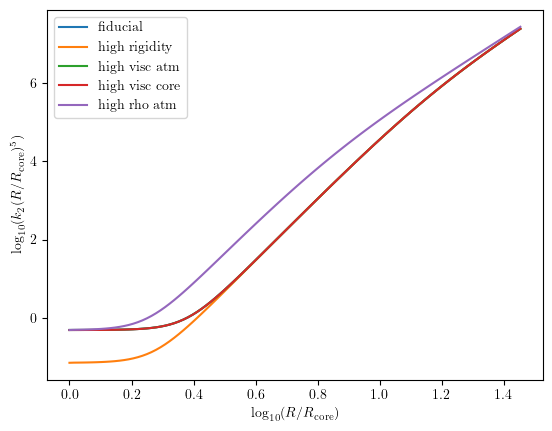

In [47]:
fig, ax = plt.subplots()
ax.plot(np.log10(atm_radii/R_core), np.log10(k2*(atm_radii/R_core)**5), label="fiducial")
ax.plot(np.log10(atm_radii/R_core), np.log10(k2_high_rig*(atm_radii/R_core)**5), label="high rigidity")
ax.plot(np.log10(atm_radii/R_core), np.log10(k2_high_visc*(atm_radii/R_core)**5), label="high visc atm")
ax.plot(np.log10(atm_radii/R_core), np.log10(k2_high_visc2*(atm_radii/R_core)**5), label="high visc core")
ax.plot(np.log10(atm_radii/R_core), np.log10(k2_high_rho_atm*(atm_radii/R_core)**5), label="high rho atm")
ax.legend()
ax.set_xlabel("$\\log_{10}(R/R_\\mathrm{core})$")
ax.set_ylabel("$\\log_{10}(k_2(R/R_\\mathrm{core})^5)$")
plt.show()

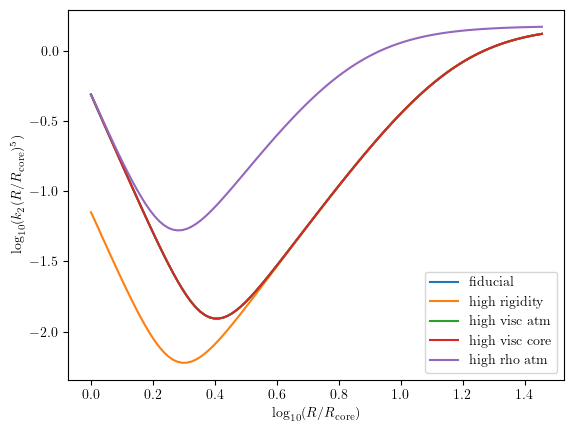

In [48]:
fig, ax = plt.subplots()
ax.plot(np.log10(atm_radii/R_core), np.log10(k2), label="fiducial")
ax.plot(np.log10(atm_radii/R_core), np.log10(k2_high_rig), label="high rigidity")
ax.plot(np.log10(atm_radii/R_core), np.log10(k2_high_visc), label="high visc atm")
ax.plot(np.log10(atm_radii/R_core), np.log10(k2_high_visc2), label="high visc core")
ax.plot(np.log10(atm_radii/R_core), np.log10(k2_high_rho_atm), label="high rho atm")
ax.legend()
ax.set_xlabel("$\\log_{10}(R/R_\\mathrm{core})$")
ax.set_ylabel("$\\log_{10}(k_2(R/R_\\mathrm{core})^5)$")
plt.show()

In [125]:
varying_core_radii = []

core_radii = np.logspace(np.log10(R_neptune/10),np.log10(R_neptune*10),10)
for i,R_core in enumerate(core_radii):
    atm_radii = np.logspace(np.log10(R_core),np.log10(R_core*100),100)
    k2 = get_k2_vs_radius(R_core, atm_radii, [rho_air, rho_neptune], [rigidity_air, rigidity_earth], [viscosity_air, viscosity_earth])
    varying_core_radii.append({"radius": atm_radii,
                               "k2": k2})
    print(f"{i+1} of {len(core_radii)} done")


1 of 10 done
2 of 10 done
3 of 10 done
4 of 10 done
5 of 10 done
6 of 10 done
7 of 10 done
8 of 10 done
9 of 10 done
10 of 10 done


IndexError: list index out of range

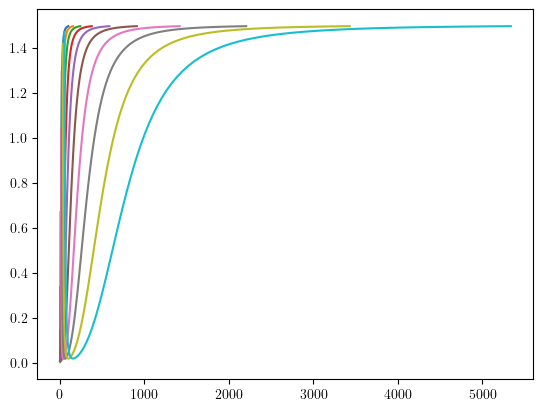

In [124]:
fig, ax = plt.subplots()
R_min = np.zeros(len(core_radii))
for i in range(len(core_radii)):
    ax.plot(varying_core_radii[i]["radius"]/core_radii[i], varying_core_radii[i]["k2"])
    idx_min = np.argmin(varying_core_radii[i]["k2"])
    R_min[i] = varying_core_radii[i]["radius"][idx_min]
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("$R/R_\\mathrm{core}$")

ValueError: x and y must be the same size

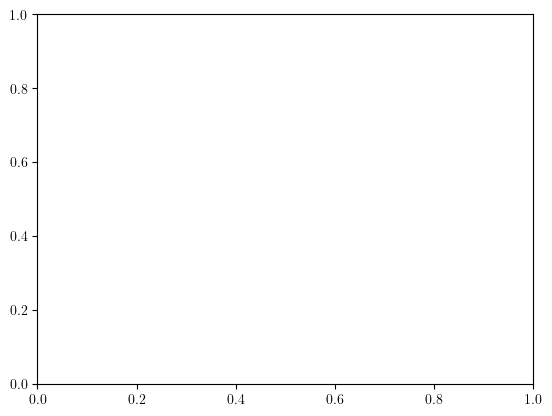

In [123]:
fig, ax = plt.subplots()
ax.scatter(core_radii, R_min)
ax.set_xscale("log")
ax.set_yscale("log")
x_interp = np.logspace(6,9,100)
ax.set_xlabel("$R_\\mathrm{core}$")
ax.set_ylabel("$R_\\mathrm{min}$")

In [ ]:
from scipy.optimize import minimize

def f_arr(x_arr, core_radius, rho_atm=rho_air, rho_core=rho_neptune, core_rigidity=rigidity_earth):
    y_arr = np.zeros(len(x_arr))
    for i in range(len(x_arr)):
        t,k = run_alma(radii = [x_arr[i], core_radius],
                densities = [rho_atm, rho_core],
                rigidities = [rigidity_air, core_rigidity],
                viscosities = [viscosity_air, viscosity_earth],
                model_types = ["newton", "maxwell"],
                show_start_stop = False)
        y_arr[i] = k[0]
    return y_arr

core_radii = np.logspace(np.log10(R_neptune/10),np.log10(R_neptune*100),100)
R_atm_min = np.zeros(len(core_radii))
k2_min = np.zeros(len(core_radii))
for i,R_core in enumerate(core_radii):
    result = minimize(f_arr, 5*R_core, args=(R_core,), bounds=[(R_core, 10*R_core)])
    R_atm_min[i] = result.x[0]
    k2_min[i] = result.fun


[5. 1.]


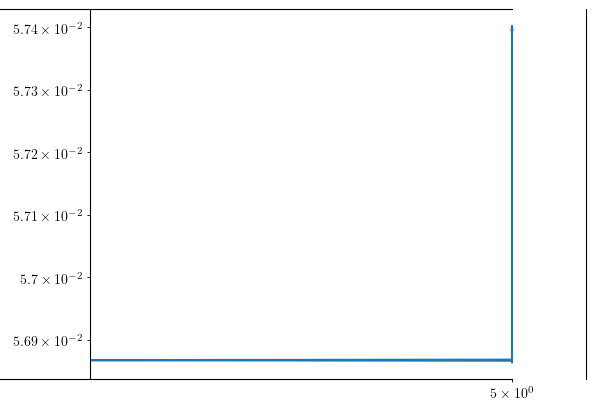

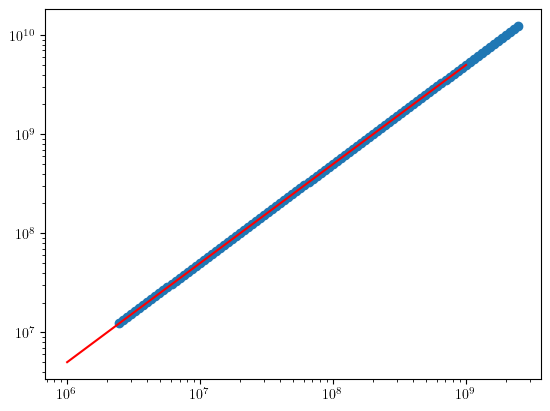

In [122]:
def power_law(x,a,b):
    return a*x**b

fig, ax = plt.subplots()
ax.plot(R_atm_min/core_radii, k2_min)
ax.set_xscale("log")
ax.set_yscale("log")

fig, ax = plt.subplots()
ax.scatter(core_radii, R_atm_min)
ax.set_xscale("log")
ax.set_yscale("log")
x_interp = np.logspace(6,9,100)
popt,pcov = curve_fit(power_law, core_radii, R_atm_min)
print(popt)
ax.plot(x_interp,power_law(x_interp,*popt), color="red")